<a href="https://colab.research.google.com/github/foxyto-coder/proyecto_integrado_2_schneider_melani/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# prompt:  armae un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Datos para las columnas
apellidos = ["González", "Rodríguez", "Pérez", "Gómez", "Fernández", "López", "Martínez", "Sánchez", "Ramírez", "Torres"]
nombres = ["Mateo", "Sofía", "Lucas", "Martina", "Benjamín", "Emma", "Thiago", "Olivia", "Bautista", "Valentina"]
materias = ["Matemáticas", "Lengua", "Ciencias Naturales", "Historia", "Geografía", "Educación Física", "Inglés", "Tecnología", "Artes", "Música"]

# Crear el DataFrame
num_filas = 100
data = {
    "Apellido": [random.choice(apellidos) for _ in range(num_filas)],
    "Nombre": [random.choice(nombres) for _ in range(num_filas)],
    "Nro_DNI": [random.randint(10000000, 99999999) for _ in range(num_filas)],
    "Materia Escolar": [random.choice(materias) for _ in range(num_filas)],
    "Nota 1er Trimestre": [random.randint(1, 10) for _ in range(num_filas)],
    "Nota 2do Trimestre": [random.randint(1, 10) for _ in range(num_filas)],
    "Nota 3er Trimestre": [random.randint(1, 10) for _ in range(num_filas)],
    "Faltas a clases": [random.randint(0, 20) for _ in range(num_filas)]
}

df = pd.DataFrame(data)

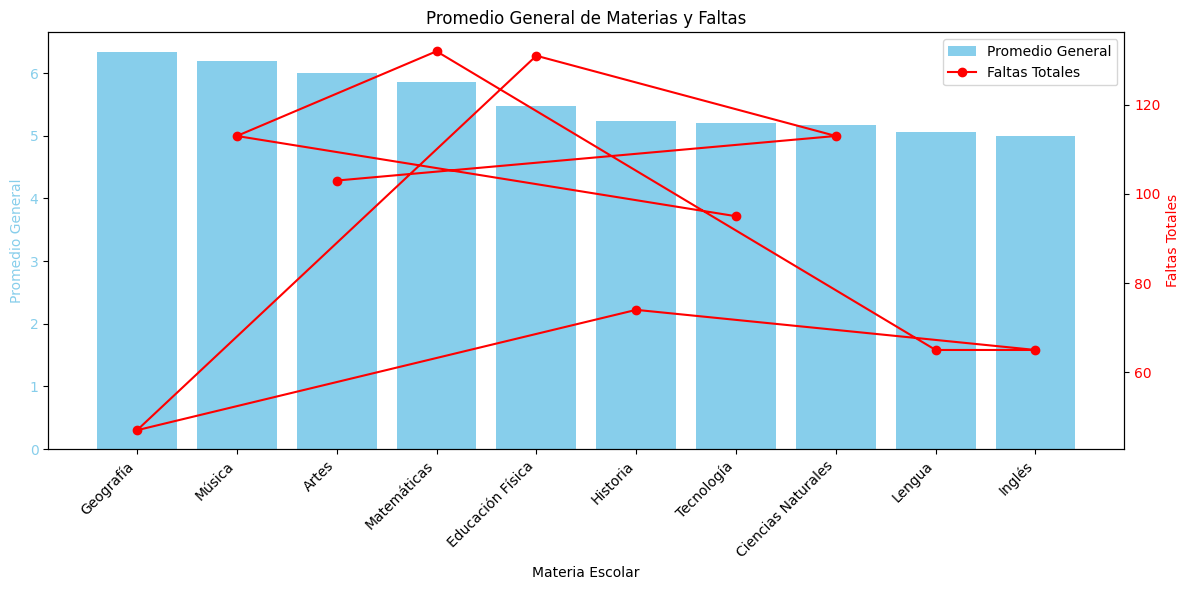

In [9]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación importame df.

import matplotlib.pyplot as plt
df.to_csv("datos_alumnos.csv", index=False)

# Calcular el promedio general de cada materia
promedios_por_materia = df.groupby("Materia Escolar")[["Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre"]].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedios_ordenados = promedios_por_materia.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_por_materia = df.groupby("Materia Escolar")["Faltas a clases"].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para los promedios
ax1.bar(promedios_ordenados.index, promedios_ordenados.values, color="skyblue", label="Promedio General")
ax1.set_xlabel("Materia Escolar")
ax1.set_ylabel("Promedio General", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")
ax1.set_title("Promedio General de Materias y Faltas")

# Segundo eje y para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color="red", marker="o", label="Faltas Totales")
ax2.set_ylabel("Faltas Totales", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Rotar etiquetas del eje x para mejor legibilidad
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

# Agregar leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper right")


plt.tight_layout()
plt.show()